In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Er wordt gesplitst op verschillende leeftijdsgroepen, ook wordt er meteen gesorteerd op overlevende om de grafiek zometeen makkelijker te kunnen maken

In [3]:
df_young_survived = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 1)].count()
df_young_died = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 0)].count()

df_20p_survived = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 1)].count()
df_20p_died = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 0)].count()

df_30p_survived = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 1)].count()
df_30p_died = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 0)].count()

df_40p_survived = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 1)].count()
df_40p_died = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 0)].count()

df_O_survived = df_train[(df_train['Age'] > 50 ) & (df_train['Survived'] == 1)].count()
df_O_died = df_train[(df_train['Age'] > 50) & (df_train['Survived'] == 0)].count()

df_NaN_survived = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 1)].count()
df_NaN_died = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 0)].count()


## Hieronder wordt  er eerst een ruw databestand aangemaakt en vervolgens omgezet naar een dataframe die gebruikt gaat worden binnen matplotlib

In [4]:
raw_data ={
    'ageclasses': ['young', '20-30', '30-40', '40-50', '50+','Age Not Available'],
    'survived': [df_young_survived.Survived , df_20p_survived.Survived , df_30p_survived.Survived , df_40p_survived.Survived , df_O_survived.Survived , df_NaN_survived.Survived],
    'died': [df_young_died.Survived , df_20p_died.Survived , df_30p_died.Survived , df_40p_died.Survived , df_O_died.Survived , df_NaN_died.Survived]
}

df_survivors = pd.DataFrame(raw_data, columns=['survived', 'died'])


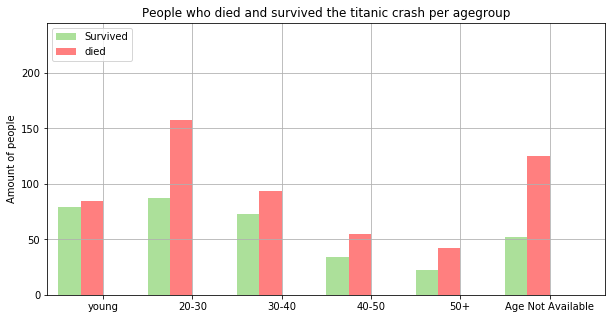

In [5]:
pos = list(range(len(df_survivors['died'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        df_survivors['survived'],
        width,
        alpha=0.5,
        color='#5BC236',
        label=raw_data['ageclasses'][0])
plt.bar([p + width for p in pos],
        df_survivors['died'],
        width,
        alpha=0.5,
        color='#FF0000',
        label=raw_data['ageclasses'][1])

# Set the y axis label
ax.set_ylabel('Amount of people')

# Set the chart's title
ax.set_title('People who died and survived the titanic crash per agegroup')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(raw_data['ageclasses'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_survivors['survived'] + df_survivors['died'])] )

# Adding the legend and showing the plot
plt.legend(['Survived', 'died'], loc='upper left')
plt.grid()
plt.show()

## In bovenstaand diagram is te zien dat de meeste bezoekers tussen de leeftijd 20-30 jaar ligt.  Ook is te zien dat het verschil tussen overlevende en doden bij mensen onder de 20 jaar het kleinst is.

## Vervolgens is het de bedoeling dat er per titel gekeken wordt hoeveel mensen het hebben overleefd. Om dit te doen zullen de naamvelden gesplitst worden. De layout is als volgt : [voornaam] , [titel]. [achternaam]

## Om deze dus te kunnen gebruiken moeten we in 2 stappen alles voor de comma en na de punt uitfilteren. Dat gebeurd hieronder. Vervolgens maakt hij 2 dataframes aan. Één met alle overlevende en één met alle overledenen. Hier kan dan uiteindelijk gekeken worden hoevaak elke titel weergegeven wordt.

In [7]:
#namessplits = df_train['Name'].split()
split1 = pd.DataFrame(df_train['Name'].str.split(", ").tolist(), columns=['nutteloos','nodig'])
split2 = pd.DataFrame(split1['nodig'].str.split(". ",1).tolist(), columns=['nodig','nutteloos'])
df_train['Title'] = split2['nodig']
df_numbers = pd.DataFrame()
df_survivors = df_train[df_train['Survived'] == 1]
df_casualties = df_train[df_train['Survived'] == 0]

In [8]:
df_survivors['Title'].value_counts()

Miss      127
Mrs        99
Mr         81
Master     23
Dr          3
Mlle        2
Col         1
Lady        1
Major       1
Mme         1
Ms          1
Sir         1
th          1
Name: Title, dtype: int64

In [9]:
df_casualties['Title'].value_counts()

Mr          436
Miss         55
Mrs          26
Master       17
Rev           6
Dr            4
Jonkheer      1
Don           1
Capt          1
Col           1
Major         1
Name: Title, dtype: int64

In [10]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Sir           1
Ms            1
Mme           1
Don           1
Lady          1
Capt          1
th            1
Name: Title, dtype: int64

## Nadat alle losse counts zijn gedaan gaan we één nieuwe dataframe aanmaken waar ze alle drie in voorkomen. Dit om het plotten zometeen makkelijker te maken.

In [11]:
df_numbers['Passengers'] = df_train['Title'].value_counts()
df_numbers['Survivors'] = df_survivors['Title'].value_counts()
df_numbers['Casualties'] = df_casualties['Title'].value_counts()

In [12]:
df_numbers

,Passengers,Survivors,Casualties
Mr,517,81.0,436.0
Miss,182,127.0,55.0
Mrs,125,99.0,26.0
Master,40,23.0,17.0
Dr,7,3.0,4.0
Rev,6,NaN,6.0
Col,2,1.0,1.0
Major,2,1.0,1.0
Mlle,2,2.0,NaN
Jonkheer,1,NaN,1.0


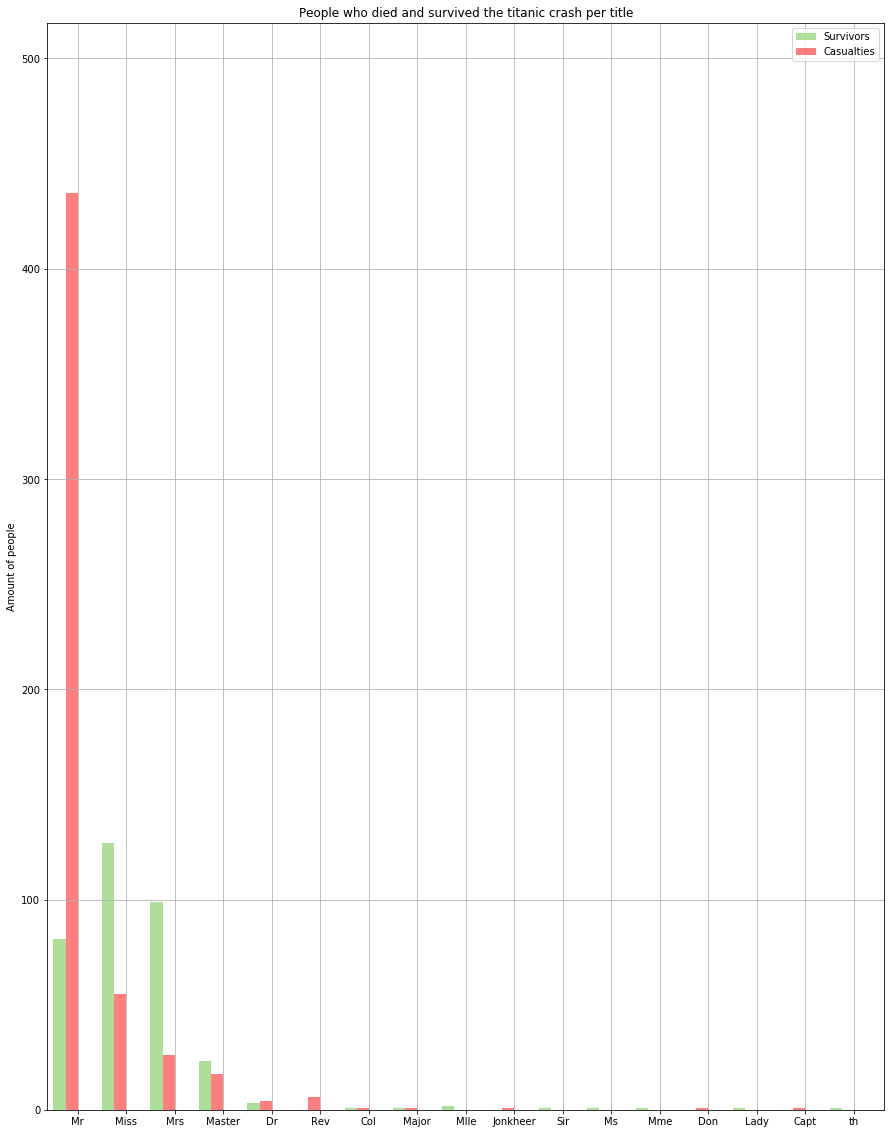

In [13]:
pos = list(range(len(df_numbers['Passengers'])))
width = 0.25

fig, ax = plt.subplots(figsize=(15,20))

plt.bar(pos,
        df_numbers['Survivors'],
        width,
        alpha=0.5,
        color='#5BC236',
        label=raw_data['ageclasses'][0])
plt.bar([p + width for p in pos],
        df_numbers['Casualties'],
        width,
        alpha=0.5,
        color='#FF0000',
        label=raw_data['ageclasses'][1])

# Set the y axis label
ax.set_ylabel('Amount of people')

# Set the chart's title
ax.set_title('People who died and survived the titanic crash per title')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_numbers.index)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_numbers['Survivors'] + df_numbers['Casualties'])] )

# Adding the legend and showing the plot
plt.legend(['Survivors', 'Casualties'], loc='upper right')
plt.grid()
plt.show()

## Omdat in bovenstaande diagram een hoop onduidelijk is (behalve de 4 grote groepen) Zal hieronder  ervoor gekozen worden om de kleinere groepen samen te voegen tot 1 geheel, genaamd Overige. Hier is voor gekozen om het diagram overzichtelijk te maken

In [19]:
df_train['Title'] = np.where(df_train.Title.isin(['Lady','Countess','Rev','Capt','Col','Don','Dr','Major','Sir','Jonkheer','Dona','Mlle','Mme','Ms','th']),'Overige', df_train['Title'])

## Hierboven is de splitsing gemaakt en heten alle overige titels nu Overige. Vervolgens moeten alle aantallen opnieuw getelt gan worden en opnieuw geplot worden in een diagram. Dat staat hieronder maar gebeurd hetzelfde als hierboven

In [20]:
#namessplits = df_train['Name'].split()
df_numbers = pd.DataFrame()
df_survivors = df_train[df_train['Survived'] == 1]
df_casualties = df_train[df_train['Survived'] == 0]

df_numbers['Passengers'] = df_train['Title'].value_counts()
df_numbers['Survivors'] = df_survivors['Title'].value_counts()
df_numbers['Casualties'] = df_casualties['Title'].value_counts()

df_numbers

,Passengers,Survivors,Casualties
Mr,517,81,436
Miss,182,127,55
Mrs,125,99,26
Master,40,23,17
Overige,27,12,15


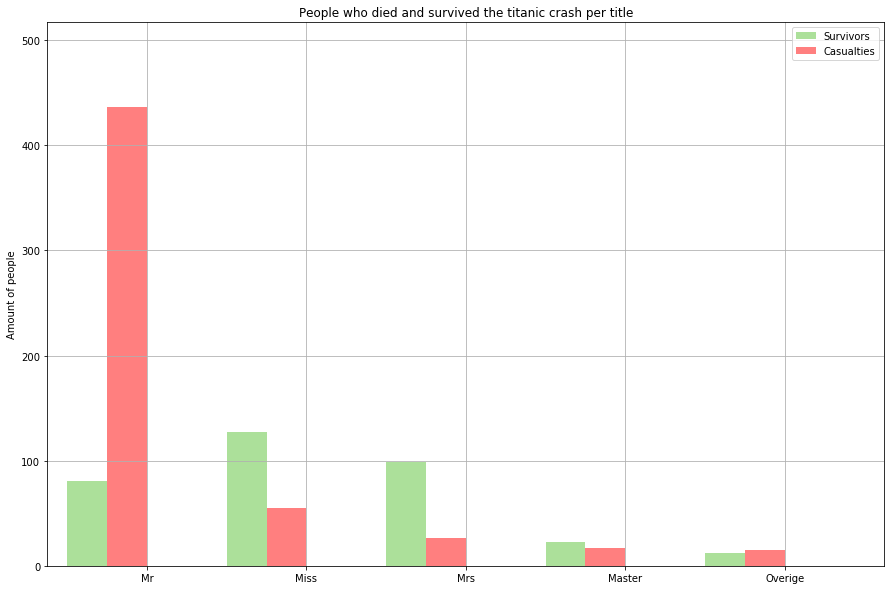

In [22]:
pos = list(range(len(df_numbers['Passengers'])))
width = 0.25

fig, ax = plt.subplots(figsize=(15,10))

plt.bar(pos,
        df_numbers['Survivors'],
        width,
        alpha=0.5,
        color='#5BC236',
        label=raw_data['ageclasses'][0])
plt.bar([p + width for p in pos],
        df_numbers['Casualties'],
        width,
        alpha=0.5,
        color='#FF0000',
        label=raw_data['ageclasses'][1])

# Set the y axis label
ax.set_ylabel('Amount of people')

# Set the chart's title
ax.set_title('People who died and survived the titanic crash per title')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_numbers.index)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_numbers['Survivors'] + df_numbers['Casualties'])] )

# Adding the legend and showing the plot
plt.legend(['Survivors', 'Casualties'], loc='upper right')
plt.grid()
plt.show()

## In bovenstande diagram is de zien dat er tijdens het ongeluk de meeste mannen zijn overleden. Onder de vrouwen is te zien dat er bij getrouwde vrouwen (mrs) gemiddeld meer vrouwen overleven dan ongetrouwde vrouwen (miss)